# Black Friday Sales Prediction

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

<b>Problem: Predict purchase amount.</b>

Data Overview¶


   - User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
   - Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
   - Gender: indicates the gender of the person making the transaction.
   - Age: indicates the age group of the person making the transaction.
   - Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
   - City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
   - Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
   - Marital_Status: is 0 if the user is not married and 1 otherwise.
   - Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
   - Purchase: Purchase amount.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 22 Black Friday Sales Prediction\raw_dataset.csv")
dataset.head(8)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,?
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854


In [3]:
dataset.shape

(550068, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550047 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 50.4+ MB


In [7]:
# Show the categorical values

cat_columns = [f for f in dataset.columns if dataset.dtypes[f] == 'object']

cat_columns

['Product_ID',
 'Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Purchase']

In [8]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000


# Data Wrangling

In [9]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                          21
dtype: int64

In [12]:
missing_values = dataset.isnull().sum()
percent_missing = dataset.isnull().sum() / dataset.shape[0] * 100

value = {
    'missing_values': missing_values,
    'percent_missing': percent_missing
}

frame = pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


Handling Product_Category_3

In [13]:
dataset.Product_Category_3.value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [14]:
dataset = dataset.drop('Product_Category_3', axis = 1)
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,?


Product_Category_2

In [15]:
dataset.Product_Category_2.value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [16]:
dataset.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

These are almost 18 categories in which these Product_Category_2 is divided ,imputing the mean value does make sense because that gives a decimal term 9.8 which is not a product category here. So, there are 2 possible ways median or mode.

In [17]:
# Replace with median

median = dataset['Product_Category_2'].median()
dataset['Product_Category_2'].fillna(median, inplace = True)

In [18]:
dataset.isnull().sum()

User_ID                        0
Product_ID                     0
Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Purchase                      21
dtype: int64

Handling Purchase column


In [20]:
dataset['Purchase'].head(10)

0     8370
1    15200
2     1422
3     1057
4        ?
5    15227
6    19215
7    15854
8    15686
9     7871
Name: Purchase, dtype: object

In <b>Purchase</b> column, missing data comes with the quesiton mark "?". We replace "?" with Nan, Python's default missing value marker for reasons of computational speed and convenience.

In [23]:
dataset['Purchase'].replace("?",np.NaN, inplace = True)
dataset['Purchase'].head()

0     8370
1    15200
2     1422
3     1057
4      NaN
Name: Purchase, dtype: object

In [26]:
mean_purchase =dataset['Purchase'].astype('float').mean()
mean_purchase

9264.004147046524

In [27]:
dataset['Purchase'].replace(np.NaN,mean_purchase, inplace = True)

In [30]:
missing_data = dataset.isnull().sum()
percent_missing = dataset.isnull().sum() / dataset.shape[0] * 100

value = {
    'missing_value' : missing_data,
    'percent_missing' : percent_missing
}
frame = pd.DataFrame(value)
frame

,missing_value,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


The dataset is clean and ready for analysis

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.2+ MB


In [34]:
dataset.to_csv('clean_dataset.csv')

## Data Exploration

In [2]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 22 Black Friday Sales Prediction\clean_dataset.csv")
df.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370.000000
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.000000
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422.000000
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.000000
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,9264.004147


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370.000000
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.000000
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422.000000
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.000000
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,9264.004147


In [4]:
df.shape

(550068, 11)

dataset.describe()

In [62]:
dataset.describe(include =['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


There are 11 features, looking into each of these features

1. User ID: Each user has been provided a unique ID. Let's see how many unique users we have in our dataset

In [5]:
df['User_ID'].nunique()

5891

There are about 500K+ rows in our dataset and 5891 unique users.

2. Product_ID: Each product that is available for sales has a specific/unique product id associated with it. Let's look into the number of unique products available for sale.

In [6]:
df['Product_ID'].nunique()

3631

There are total of 3631 product available for sales.

3. Gender: Gender is a categorical variables with category: Male(M) and Female(F)

In [8]:
df['Gender'].value_counts(normalize = True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

4. Age: Age is also a categorical data with age divided into particular range

In [10]:
age_count = df['Age'].value_counts()
age_per = df['Age'].value_counts(normalize = True)*100

value = {
    'age_count': age_count,
    'age_percentage' : age_per
}

frame = pd.DataFrame(value)
frame

,age_count,age_percentage
Age,,
26-35,219587,39.919974
36-45,110013,19.999891
18-25,99660,18.117760
46-50,45701,8.308246
51-55,38501,6.999316
55+,21504,3.909335
0-17,15102,2.745479


5. Occupation: The occupation number is the ID number of occupation type of each customer. WE can see that around 21 different occupations exist.

In [11]:
df['Occupation'].nunique()

21

6. City Category: The city has been categorized into 3 categories i.e. A, B,C

In [16]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [18]:
df.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.948186
B    9151.365069
C    9719.940003
Name: Purchase, dtype: float64

7. Stay_In_Current_Years: This depects the number of year from which a person is residing in that particular city. It has been divided into 5 categories

In [23]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [24]:
# 8. Marital_status

df.Marital_Status.value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

## Data Visualization

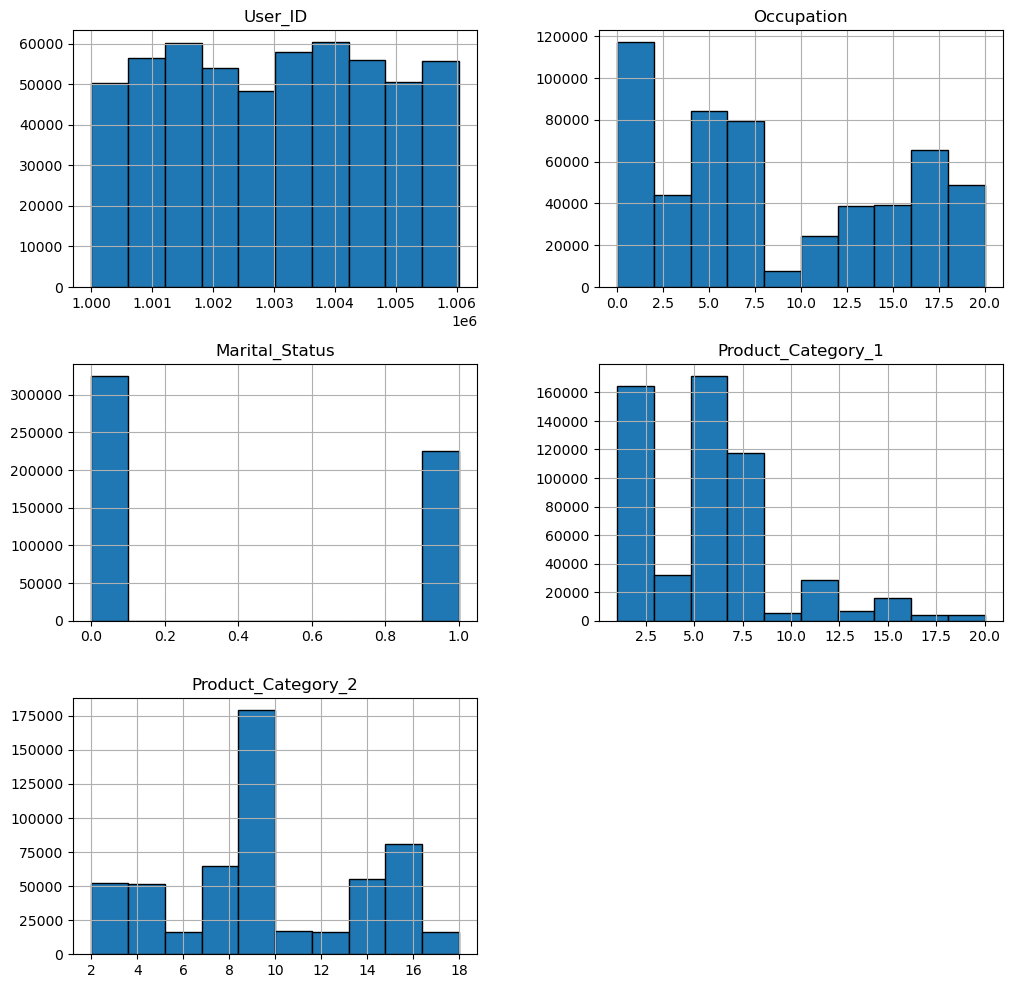

In [35]:
dataset.hist(edgecolor = 'black', figsize =(12,12) );

A) Gender

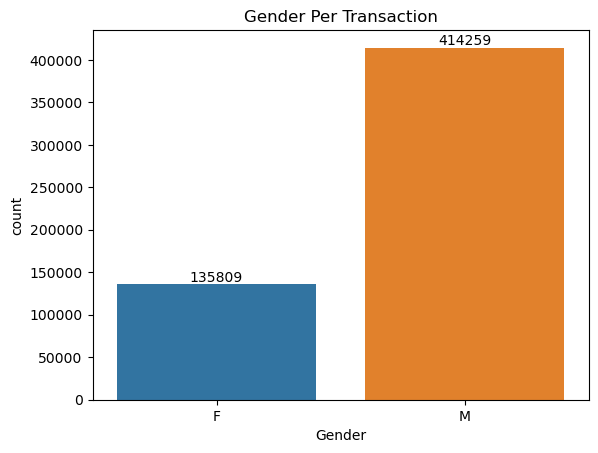

In [37]:
ax = sns.countplot(x = 'Gender', data = dataset)
plt.title('Gender Per Transaction')
for bars in ax.containers:
    ax.bar_label(bars)

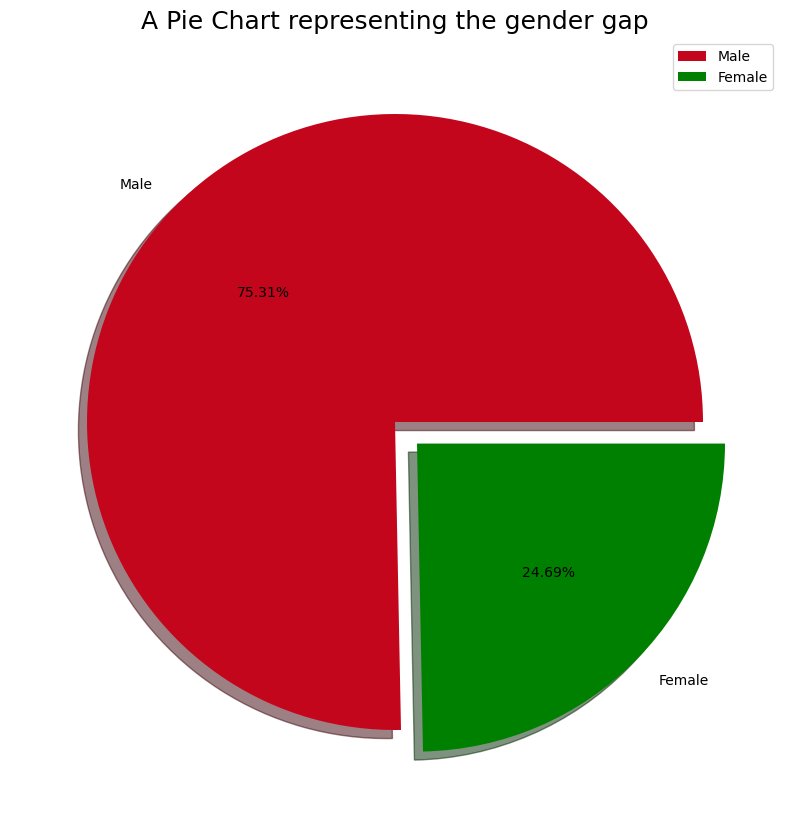

In [40]:
# Pie chart

size = dataset['Gender'].value_counts()
labels = ['Male','Female']
colors = ['#C4061D','green']
explode = [0,0.1]

plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')

plt.title('A Pie Chart representing the gender gap', fontsize = 18)
plt.axis('off')
plt.legend()
plt.show()

B) Age

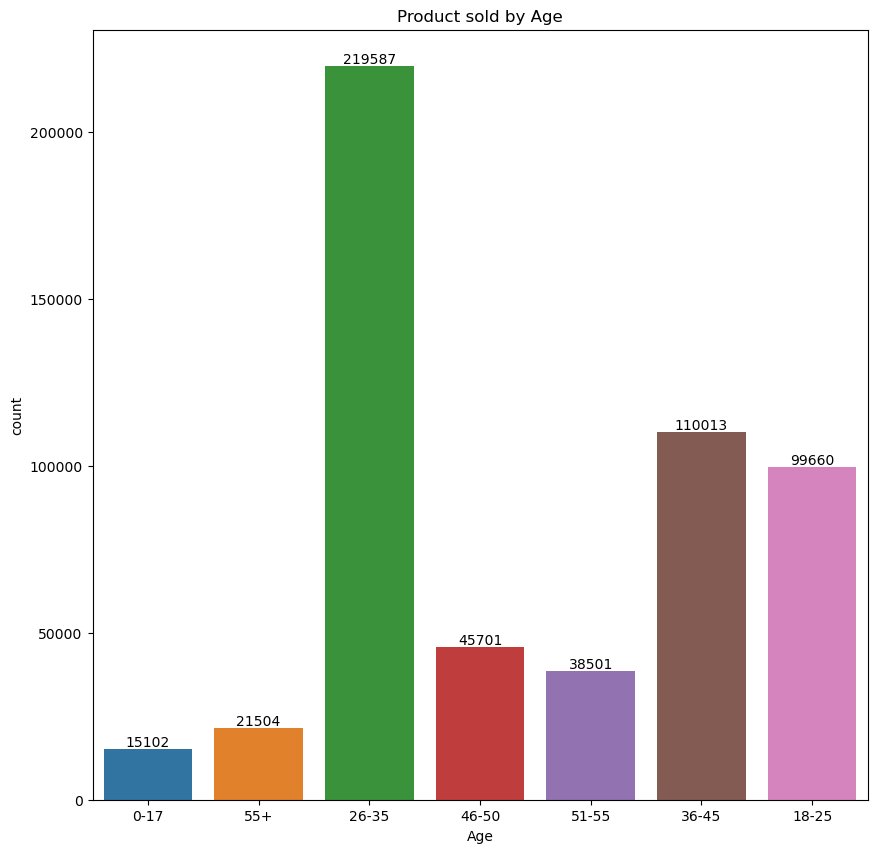

In [41]:
ax = sns.countplot(x = 'Age', data = dataset)
plt.title('Product sold by Age')

for bars in ax.containers:
    ax.bar_label(bars)

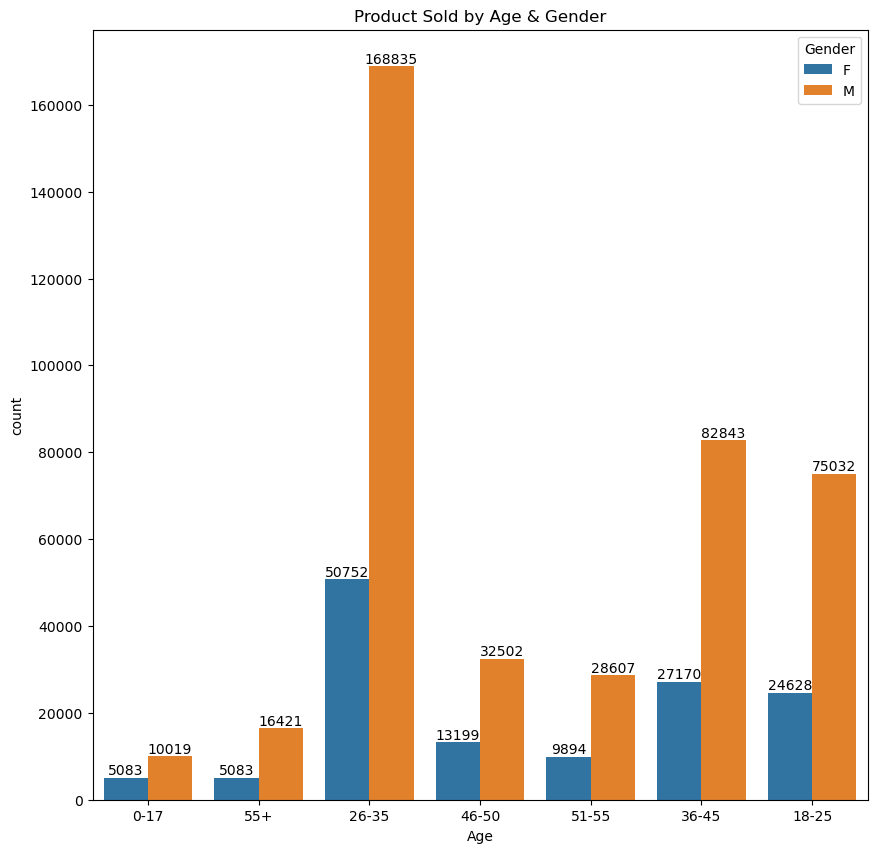

In [43]:
ax= sns.countplot(x='Age',hue='Gender',data = dataset)
plt.title('Product Sold by Age & Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
mean_sale = df.groupby('Age')['Purchase'].mean().sort_values(ascending = False)

mean_sale

Age
51-55    9534.894029
55+      9336.340681
36-45    9331.503323
26-35    9252.656861
46-50    9208.886152
18-25    9169.599459
0-17     8933.464640
Name: Purchase, dtype: float64

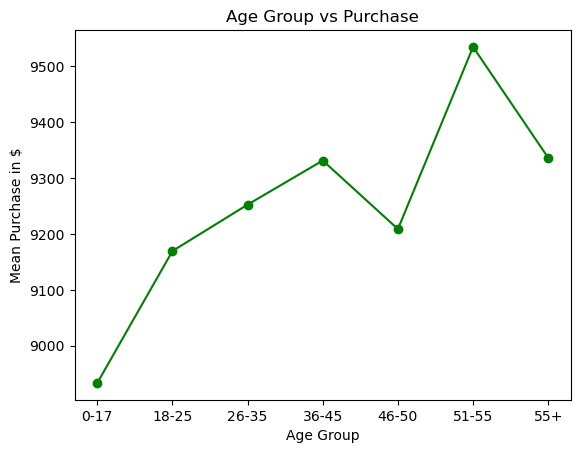

In [27]:
data = df.groupby('Age')['Purchase'].mean()

plt.plot(data.index, data.values, marker='o',color='g')
plt.xlabel('Age Group')
plt.ylabel('Mean Purchase in $')
plt.title('Age Group vs Purchase')
plt.show()

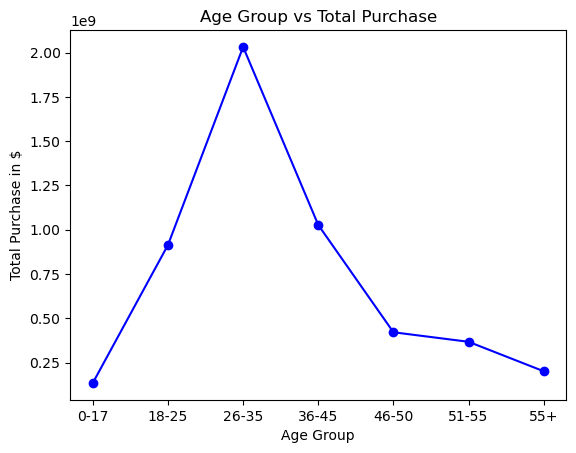

In [29]:
total_sale = df.groupby('Age')['Purchase'].sum()

plt.plot(total_sale.index, total_sale.values, color ='b', marker='o')
plt.xlabel("Age Group")
plt.ylabel('Total Purchase in $')
plt.title('Age Group vs Total Purchase')
plt.show()

C) Occupation of Customers

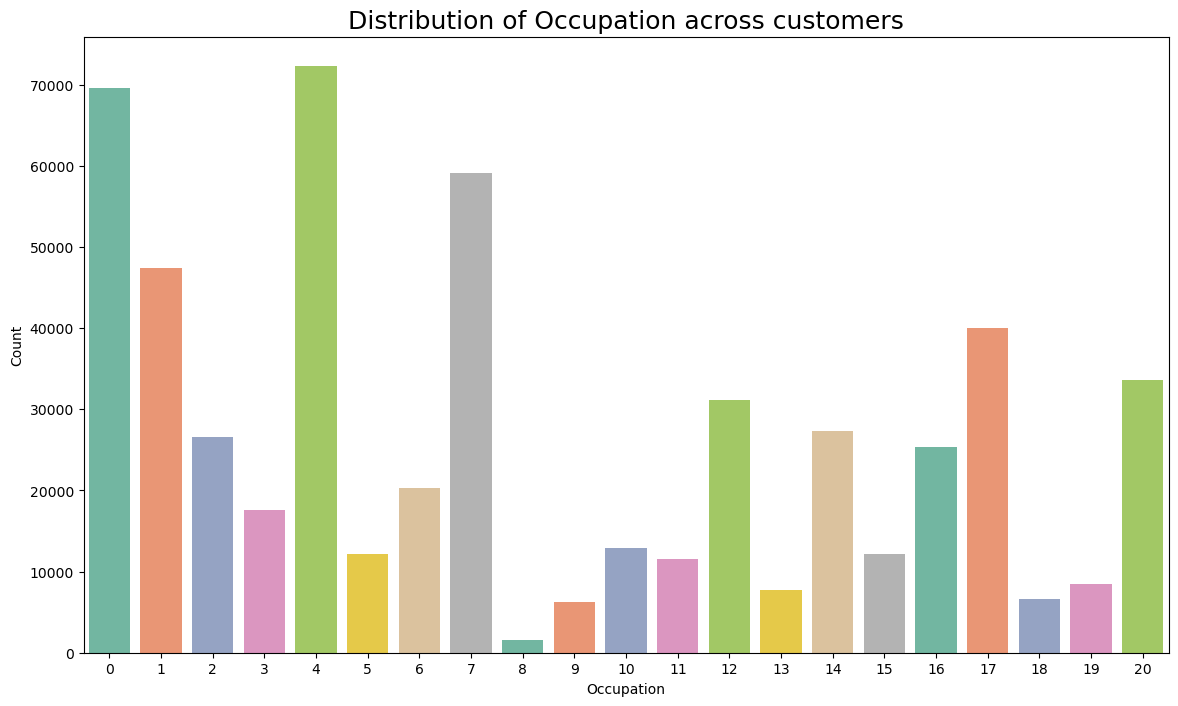

In [44]:
palette = sns.color_palette("Set2")
plt.figure(figsize = (14,8))

sns.countplot(x='Occupation', data = dataset, palette = palette)
plt.title('Distribution of Occupation across customers', fontsize =18)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

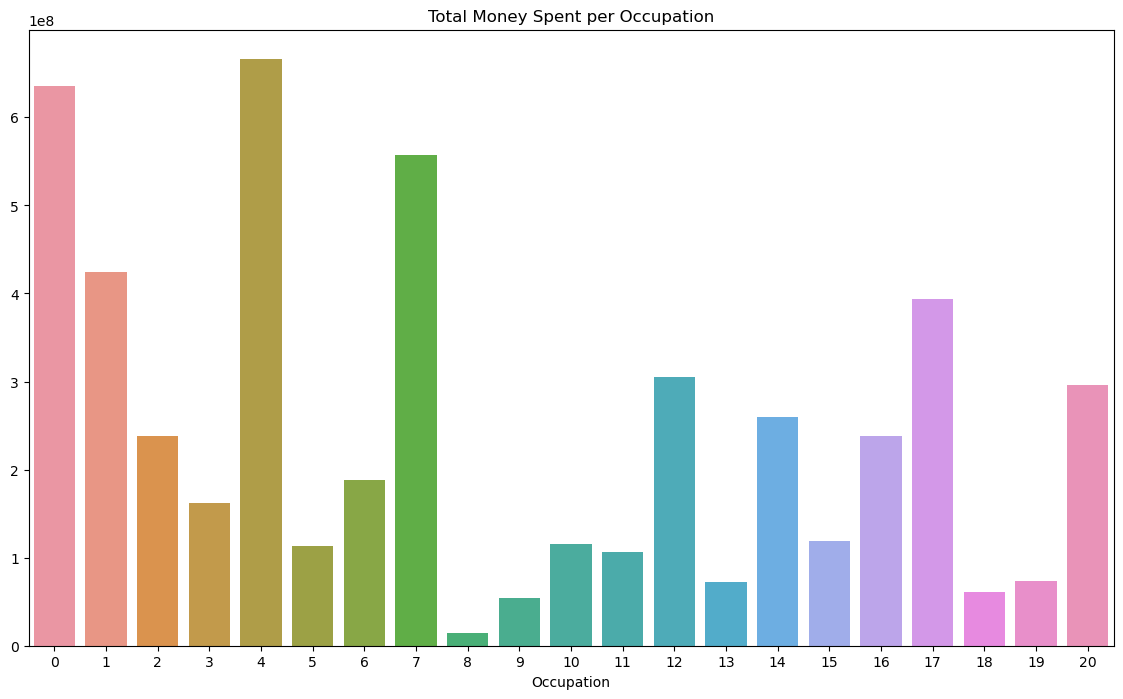

In [52]:
# Total Money spend per occupation

spent_by_occ = dataset.groupby('Occupation').sum()['Purchase']

plt.figure(figsize = (14,8))
sns.barplot(x=spent_by_occ.index, y = spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

The distribution of the mean amount spent within each occupation appears to mirror the distribution of the amount of people within each occupation.

D) Marital Status

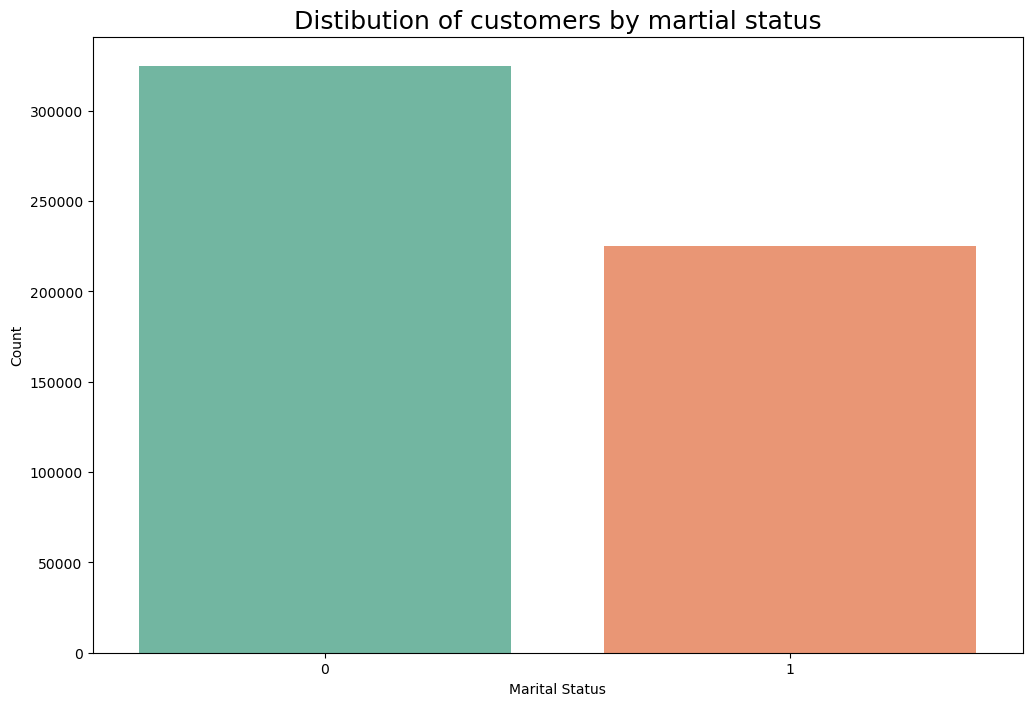

In [53]:
plt.figure(figsize = (12,8))
sns.countplot(x='Marital_Status', data = dataset, palette = palette)
plt.title('Distibution of customers by martial status', fontsize =18)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

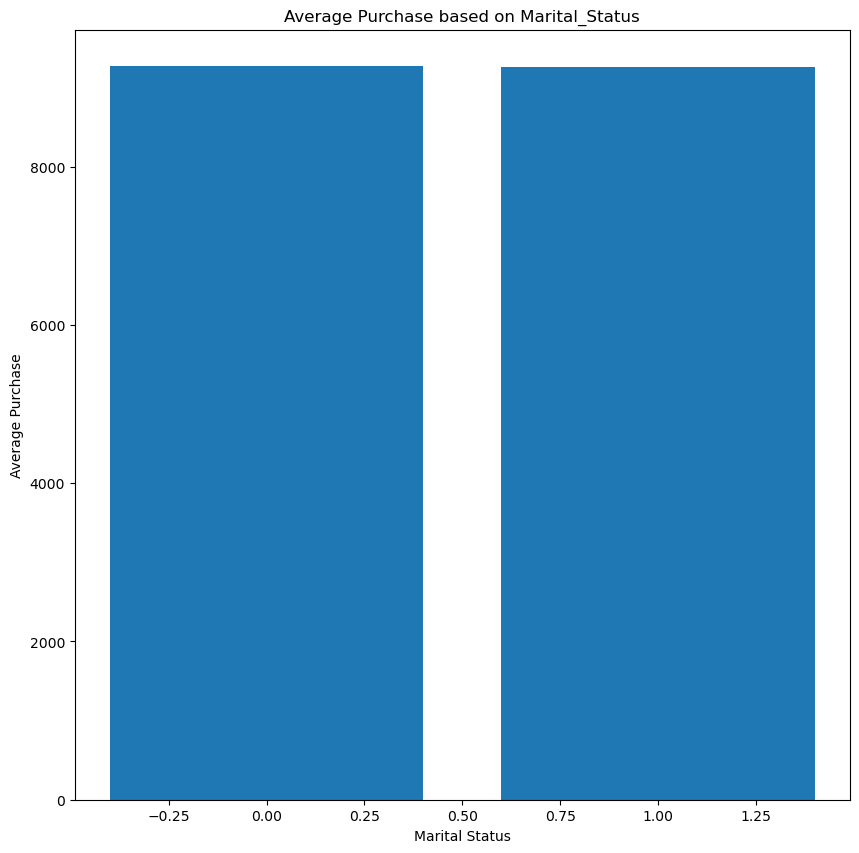

In [54]:
# Average amount spend based on Marital Status

data = dataset.groupby('Marital_Status')['Purchase'].mean()

plt.bar(data.index, data.values)
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase')
plt.title('Average Purchase based on Marital_Status')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

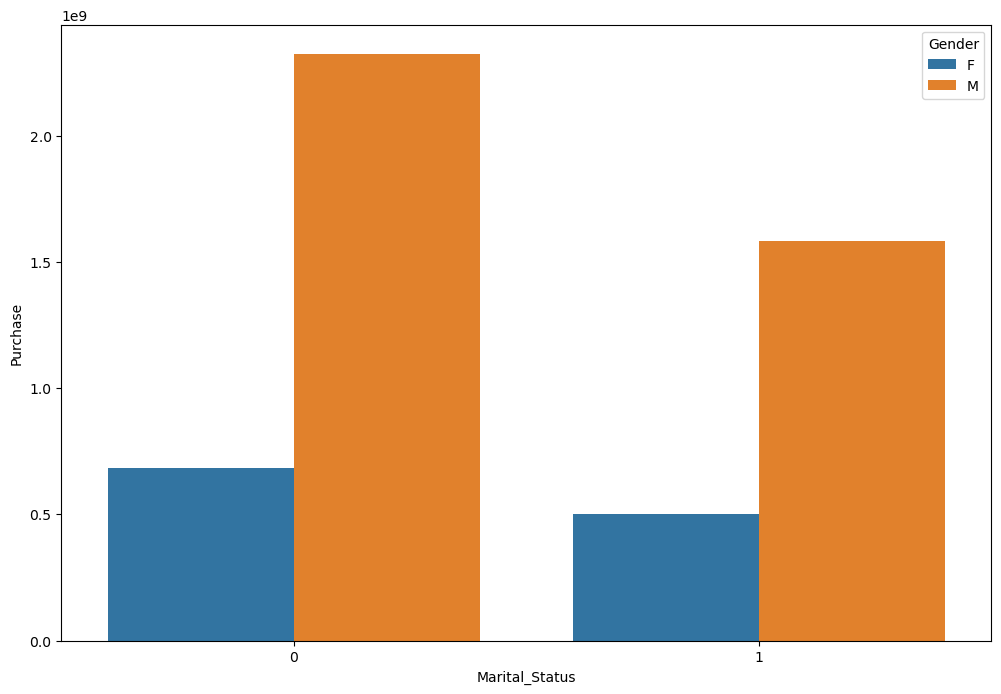

In [35]:
sales_marital_status = df.groupby(['Marital_Status','Gender'], as_index = False)['Purchase'].sum()

plt.figure(figsize = (12,8))
sns.barplot(x='Marital_Status', y='Purchase', hue='Gender',data = sales_marital_status)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

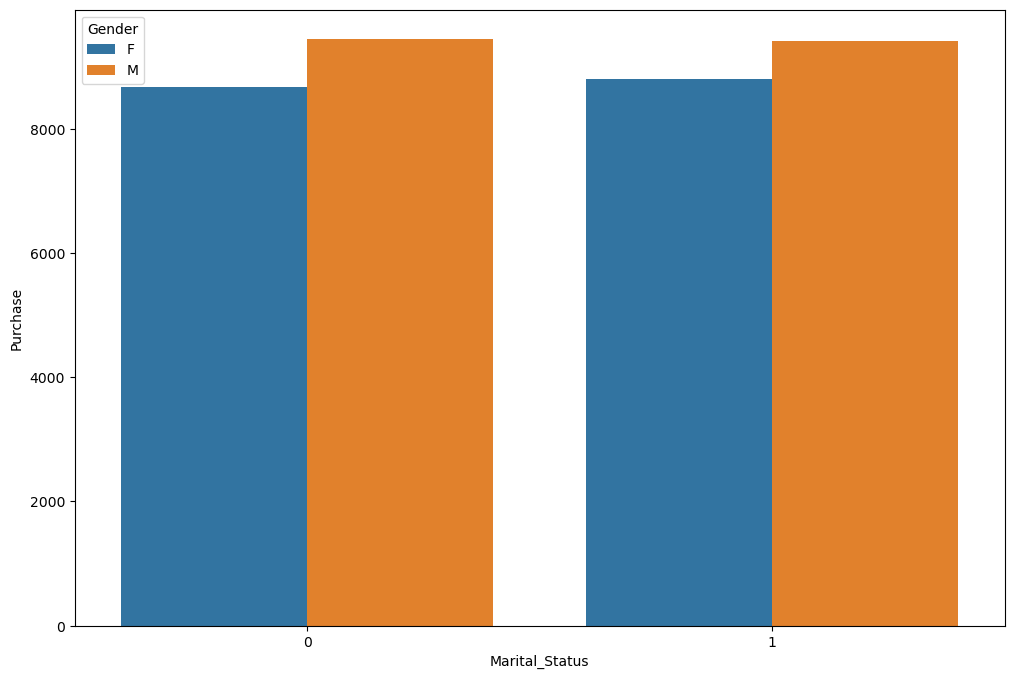

In [36]:
sales_marital_status = df.groupby(['Marital_Status','Gender'], as_index = False)['Purchase'].mean()

plt.figure(figsize = (12,8))
sns.barplot(x='Marital_Status', y='Purchase', hue='Gender',data = sales_marital_status)

E) City Category

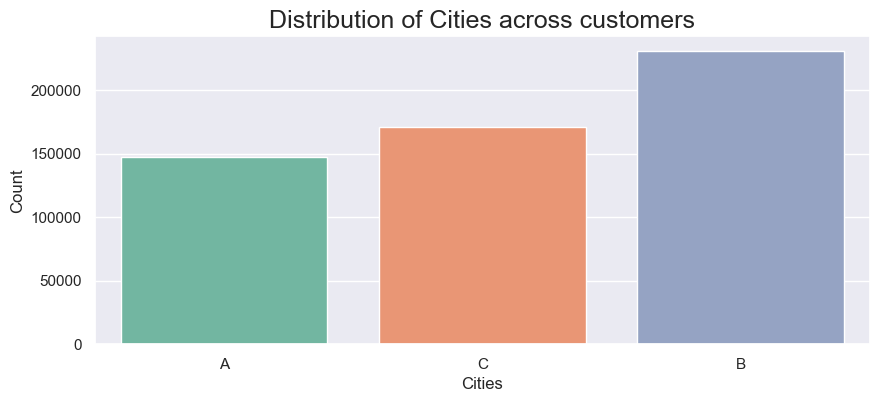

In [59]:
plt.figure(figsize =(10,4))
sns.countplot(x='City_Category', data = dataset, palette = palette)
plt.title('Distribution of Cities across customers', fontsize = 18)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

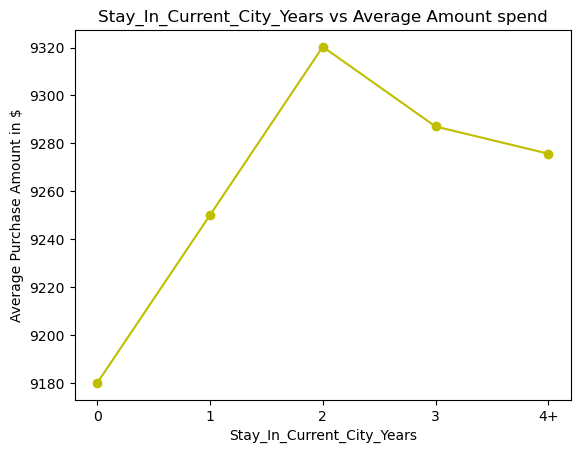

In [31]:
# Average amount spend based on the time of stay in the current city

data = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index, data.values, marker = 'o',color = 'y')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Average Purchase Amount in $')
plt.title('Stay_In_Current_City_Years vs Average Amount spend')
plt.show()

People who have been living in city around 2 years or more years are on an average spending more amount in sales.

People who have lived in city for like around 1 years have spent most in sales.

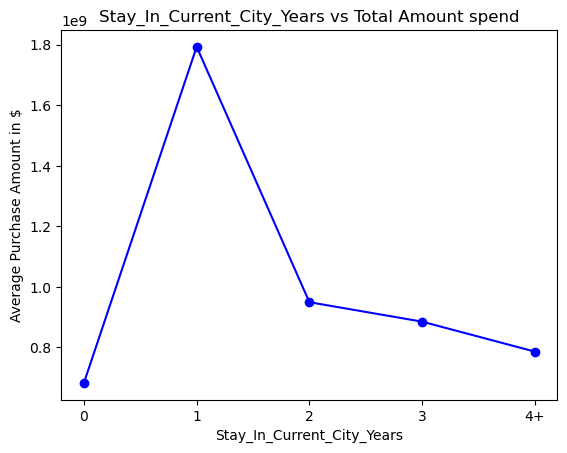

In [32]:
# Average amount spend based on the time of stay in the current city

data = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()
plt.plot(data.index, data.values, marker = 'o',color = 'b')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Average Purchase Amount in $')
plt.title('Stay_In_Current_City_Years vs Total Amount spend')
plt.show()

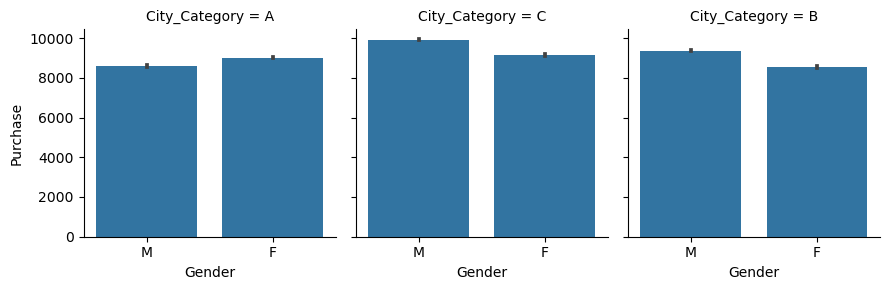

In [37]:
g = sns.FacetGrid(df, col = 'City_Category')
g.map(sns.barplot,'Gender','Purchase')
plt.show()

# Data Preprocessing

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 22 Black Friday Sales Prediction\clean_dataset.csv")
df.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370.000000
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.000000
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422.000000
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.000000
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,9264.004147


In [25]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370.000000
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.000000
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422.000000
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.000000
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,9264.004147


In [26]:
# User_id preprocessing, eg 10000000 -> 1
df['User_ID'] = df['User_ID'] - 1000000

# product_id preprocessing
df['Product_ID'] = df['Product_ID'].str.replace('P00','')

df['Product_ID'] = pd.to_numeric(df['Product_ID'], errors = 'coerce')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


In [28]:
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')

In [29]:
cat_cols = df.select_dtypes(['object']).columns
cat_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

In [30]:
df[df['Stay_In_Current_City_Years'] == '4+']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
4,2,285442,M,55+,16,C,4+,0,8,9,9264.004147
19,8,249542,M,26-35,12,C,4+,1,1,5,19614.000000
20,8,220442,M,26-35,12,C,4+,1,5,14,8584.000000
21,8,156442,M,26-35,12,C,4+,1,8,9,9872.000000
22,8,213742,M,26-35,12,C,4+,1,8,9,9743.000000
...,...,...,...,...,...,...,...,...,...,...,...
550050,6012,371644,M,36-45,15,C,4+,1,20,9,368.000000
550055,6019,372445,M,26-35,0,A,4+,0,20,9,238.000000
550056,6022,375436,M,26-35,17,C,4+,0,20,9,254.000000
550065,6036,375436,F,26-35,15,B,4+,1,20,9,137.000000


In [31]:
# 4+ to 4
df['Stay_In_Current_City_Years'] = np.where(df['Stay_In_Current_City_Years'].str[:2]=="4+",4,df['Stay_In_Current_City_Years'])

#object to int
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'],errors='coerce')

In [32]:
# Gender
df['Gender'] = df['Gender'].map({'F': 0, 'M':1}).astype(int)

In [33]:
# Age
# In Age group column, we modified range with its mean value
df['Age'] = df['Age'].map({'0-17':9, '18-25':22, '26-35':31, '36-45':42,
                          '46-50':48,'51-55':53,'55+':60})

df['Age'].value_counts()

Age
31    219587
42    110013
22     99660
48     45701
53     38501
60     21504
9      15102
Name: count, dtype: int64

In [34]:
# City category: dummy variables for this features

df = pd.get_dummies(df, columns=['City_Category'], drop_first = True)

In [35]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,9,8370.000000,False,False
1,1,248942,0,9,10,2,0,1,6,15200.000000,False,False
2,1,87842,0,9,10,2,0,12,9,1422.000000,False,False
3,1,85442,0,9,10,2,0,12,14,1057.000000,False,False
4,2,285442,1,60,16,4,0,8,9,9264.004147,False,True


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  City_Category_B             550068 non-null  bool   
 11  City_Category_C             550068 non-null  bool   
dtypes: bool(2), float64(1), int32(1), int64(8)
memory usage: 40.9 MB


In [37]:
df[['City_Category_B','City_Category_C']] = df[['City_Category_B','City_Category_C']].astype('uint8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  City_Category_B             550068 non-null  uint8  
 11  City_Category_C             550068 non-null  uint8  
dtypes: float64(1), int32(1), int64(8), uint8(2)
memory usage: 40.9 MB


In [38]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,9,8370.000000,0,0
1,1,248942,0,9,10,2,0,1,6,15200.000000,0,0
2,1,87842,0,9,10,2,0,12,9,1422.000000,0,0
3,1,85442,0,9,10,2,0,12,14,1057.000000,0,0
4,2,285442,1,60,16,4,0,8,9,9264.004147,0,1


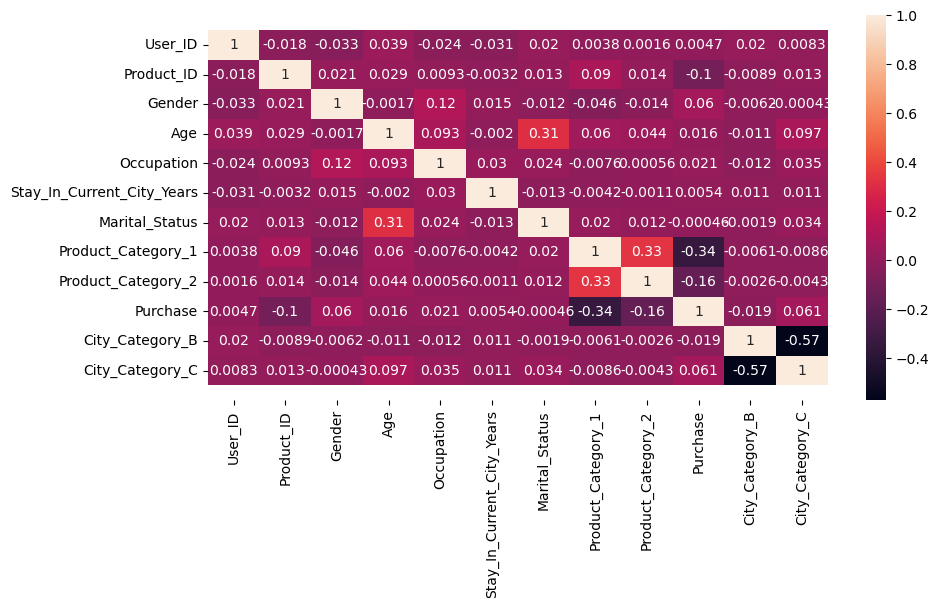

In [41]:
plt.figure(figsize = (10,5))

cor = df.corr()
ax = sns.heatmap(cor, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Model Development

In [42]:
df.head(8)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,9,8370.000000,0,0
1,1,248942,0,9,10,2,0,1,6,15200.000000,0,0
2,1,87842,0,9,10,2,0,12,9,1422.000000,0,0
3,1,85442,0,9,10,2,0,12,14,1057.000000,0,0
4,2,285442,1,60,16,4,0,8,9,9264.004147,0,1
5,3,193542,1,31,15,3,0,1,2,15227.000000,0,0
6,4,184942,1,48,7,2,1,1,8,19215.000000,1,0
7,4,346142,1,48,7,2,1,1,15,15854.000000,1,0


In [43]:
X = df.drop('Purchase', axis = 1)
y = df['Purchase']

In [44]:
# train_test_split for model development
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

print('Size of train data: ',x_train.shape[0])
print('Size of test data: ',x_test.shape[0])

Size of train data:  385047
Size of test data:  165021


In [46]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train, y_train) # training the algorithm

#Getting the coefficient and intercept
print('Coefficents: ', lm.coef_)
print('\n\n Intercept: ',lm.intercept_)

Coefficents:  [ 1.50149427e-02 -3.73959580e-03  5.35206606e+02  1.51286236e+01
  6.80763722e+00  1.26387297e+01 -6.02463340e+01 -4.08229770e+02
 -5.94516629e+01  1.79218044e+02  6.99340569e+02]


 Intercept:  11364.895239730751


In [47]:
y_pred = lm.predict(x_test)

from sklearn import metrics
print('R2_score: ',metrics.r2_score(y_test,y_pred))
print('Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_score:  0.1322015273576561
Mean Square Error:  4684.943048950786


The score generatetd with the Linear Regression model was very low so used Regularized Linear Model i.e Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

In [49]:
RR = Ridge(alpha = 0.05)

RR.fit(x_train, y_train)
y_pred = RR.predict(x_test)

print('R2_score: ', metrics.r2_score(y_test,y_pred))
print('Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2_score:  0.13220152747073066
Mean Square Error:  4684.943048645561


Linear Regression Models were not given much improvment, let's try non-linear regression model

### Decision  Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
DT = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)

DT. fit(x_train, y_train)

y_pred = DT.predict(x_test)

print('R2_score: ',metrics.r2_score(y_test, y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_score:  0.705742295772517
rmse:  2728.0906451031633


In [52]:
DT = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 150)

DT. fit(x_train, y_train)

y_pred = DT.predict(x_test)

print('R2_score: ',metrics.r2_score(y_test, y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_score:  0.6706455581436673
rmse:  2886.2014308560288


### Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 3, max_depth = 10, n_estimators = 25)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('r2 score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 score:  0.6913670407810375
rmse:  2793.9332532196945


In [55]:
rf2 = RandomForestRegressor(random_state=3, max_depth=10,min_samples_split=500,oob_score=True)

rf2.fit(x_train, y_train)
y_pred = rf2.predict(x_test)

print('r2 score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 score:  0.6886550312448454
rmse:  2806.1817844618113


In [76]:
rf3 = RandomForestRegressor(random_state = 3, max_depth = 15, min_samples_split = 100, n_estimators = 30)

rf3.fit(x_train, y_train)
y_pred = rf3.predict(x_test)

print('r2 score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 score:  0.7136747244631079
rmse:  2691.0682902922777


### Extra Trees Regressor

In [59]:
from sklearn.ensemble import ExtraTreesRegressor

rf = ExtraTreesRegressor()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('r2_score: ', metrics.r2_score(y_test, y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score:  0.681828138126676
rmse:  2836.780675901053


### XGB Regressor

In [61]:
from xgboost import XGBRegressor

# Model 1

xgb1 = XGBRegressor(n_estimators =1000, learning_rate = 0.05)

xgb1.fit(x_train, y_train)
y_pred = xgb1.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test, y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score:  0.7315610652335063
rmse:  2605.6592948927964


In [70]:
# Model 2

xgb2 = XGBRegressor(n_estimators =500, max_depth = 10, learning_rate = 0.05)

xgb2.fit(x_train, y_train)
y_pred = xgb2.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test, y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score:  0.7422107352082075
rmse:  2553.4495939429908


In [64]:
# XGBoost Model 3

xgb3 = XGBRegressor(n_estimators = 6,max_depth=500)

xgb3.fit(x_train,y_train)
y_pred = xgb3.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.6404489541969651
rmse:  3015.609850927922


In [65]:
# XGBoost Model 4

xgb4 = XGBRegressor(learning_rate=1.0,max_depth=6,min_child_weight=40,seed=0)

xgb4.fit(x_train,y_train)
y_pred = xgb4.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.7265218807955076
rmse:  2630.002536895758


In [66]:

# XGBoost Model 5

xgb5 = XGBRegressor(n_estimators = 450,max_depth=8,learning_rate = 0.076)

xgb5.fit(x_train,y_train)
y_pred = xgb5.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.7400514326383856
rmse:  2564.1214356000382


In [67]:

# XGBoost Model 6

xgb6 = XGBRegressor(n_estimators = 470,max_depth=9,learning_rate = 0.06)

xgb6.fit(x_train,y_train)
y_pred = xgb6.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.7414573469891705
rmse:  2557.178095522798


# Conclusion

Comparing all the models, we conclude that XGBRegressor model is the best model to be able to predict purchase amount from our dataset.

In [71]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df1 = df.head(25)
df1.head()

,Actual,Predicted
41001,15228.0,14000.544922
16151,1088.0,725.833923
507262,16426.0,16671.822266
368698,12042.0,17894.365234
353782,8699.0,7331.654297


In [72]:
df

,Actual,Predicted
41001,15228.0,14000.544922
16151,1088.0,725.833923
507262,16426.0,16671.822266
368698,12042.0,17894.365234
353782,8699.0,7331.654297
...,...,...
171866,9955.0,8634.625977
400075,15809.0,14126.082031
302882,13698.0,12351.547852
499383,9856.0,11205.997070


In [73]:
# Feature Importance

imp = pd.DataFrame(xgb2.feature_importances_, index = X.columns, columns = ['importance'])
imp.sort_values(by='importance', ascending = False)

,importance
Product_Category_1,0.816715
Product_ID,0.032461
Product_Category_2,0.025891
City_Category_C,0.025887
Occupation,0.014912
User_ID,0.014696
Age,0.014605
City_Category_B,0.014082
Stay_In_Current_City_Years,0.013854
Marital_Status,0.013532


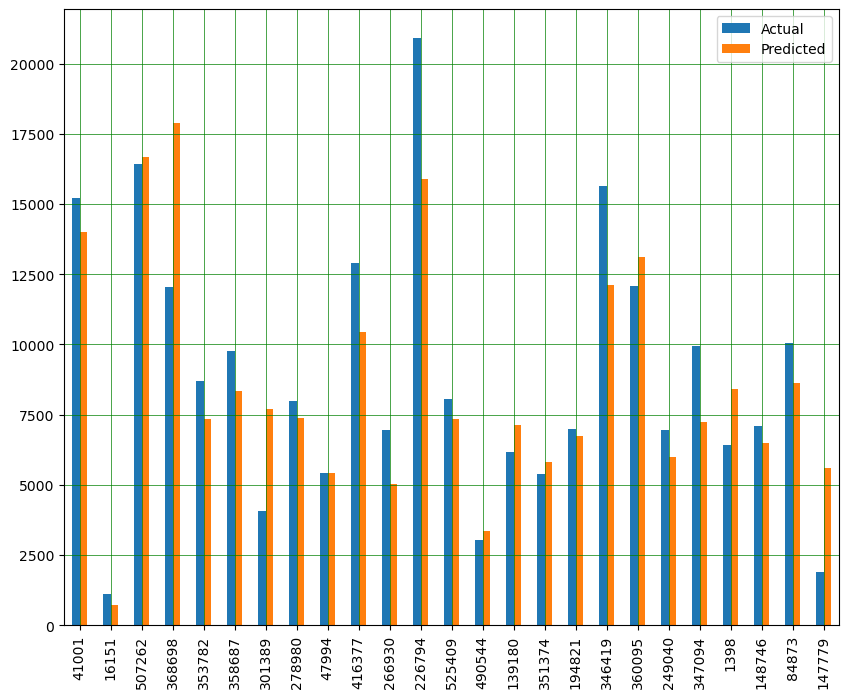

In [74]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()